In [2]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

/home/gsamith/.local/lib/python3.9/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.9.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


### Loading Pre-trained Model

In [3]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

### Test Image Predictions

In [5]:
im_fname = utils.download("http://images.cocodataset.org/val2017/000000397133.jpg",
                          path='000000397133.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

100%|██████████| 196/196 [00:00<00:00, 850.93KB/s]


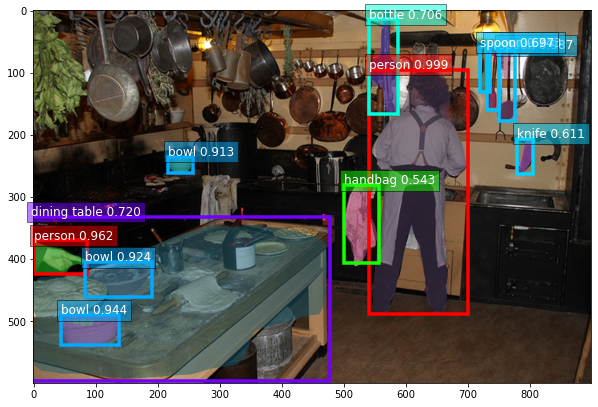

In [6]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

### Import Validation Dataset

In [1]:
import json
with open('instances_val2017.json', 'r') as f:
    dataset = json.load(f)

### Validation Prediction Examples

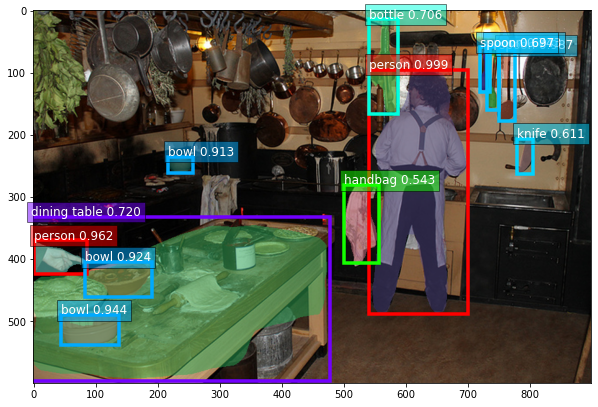

100%|██████████| 40/40 [00:00<00:00, 300.23KB/s]


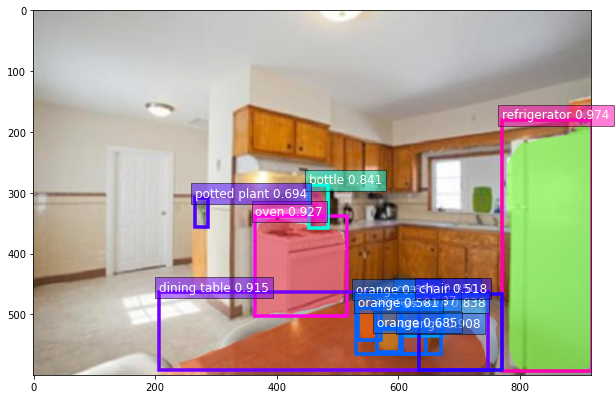

100%|██████████| 140/140 [00:00<00:00, 687.45KB/s]


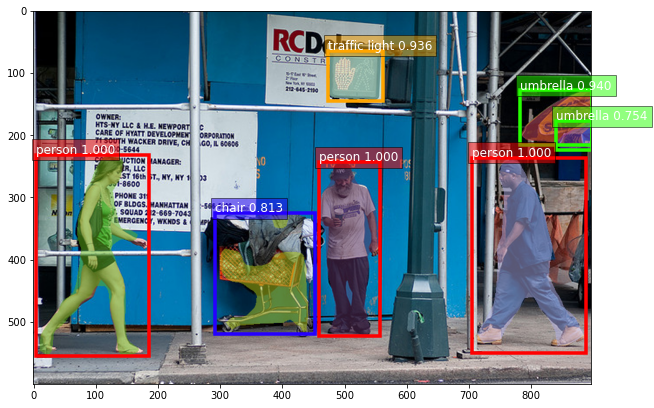

180KB [00:00, 873.89KB/s]                        


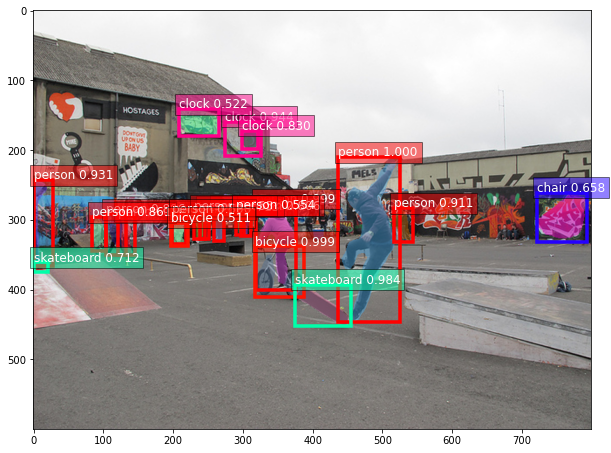

100%|██████████| 203/203 [00:00<00:00, 908.92KB/s]


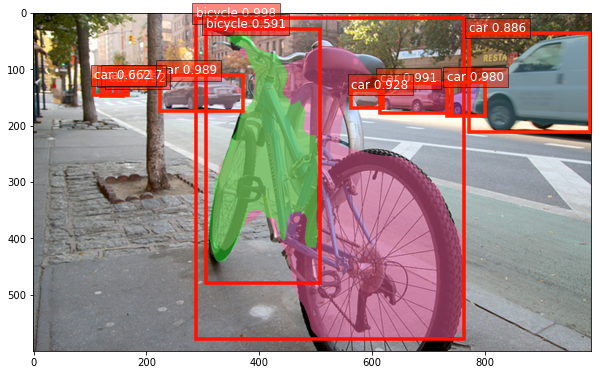

100%|██████████| 80/80 [00:00<00:00, 586.94KB/s]


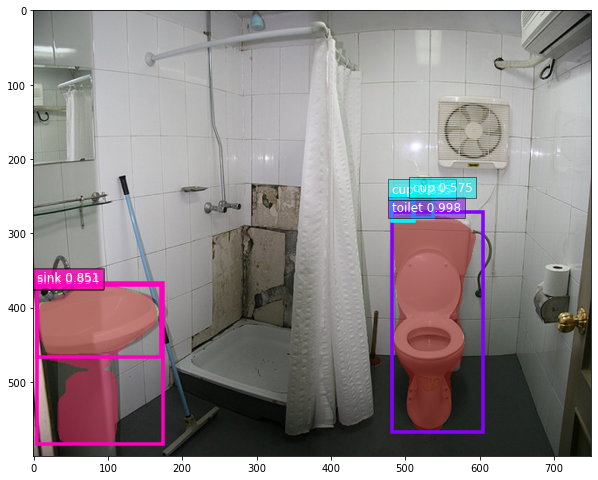

100%|██████████| 76/76 [00:00<00:00, 543.36KB/s]


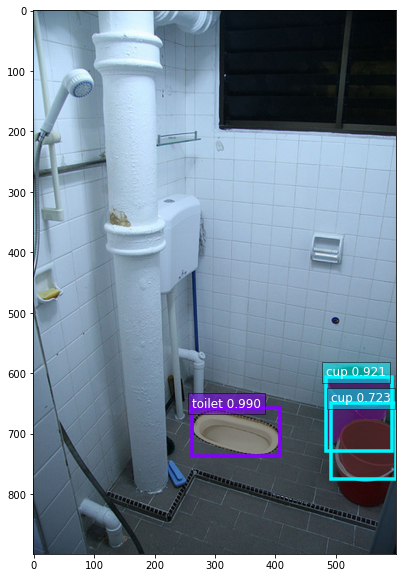

139KB [00:00, 678.50KB/s]                        


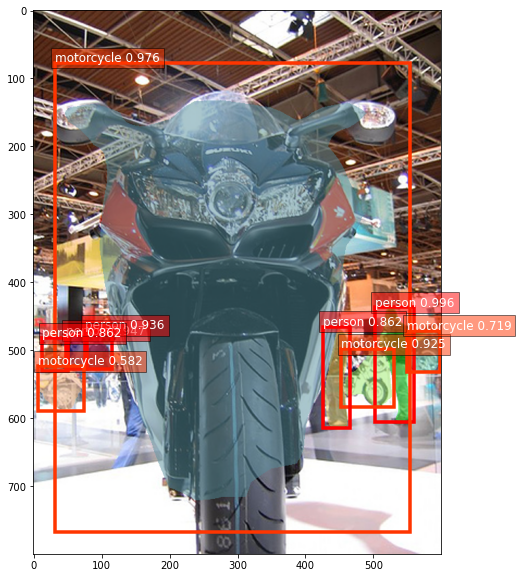

187KB [00:00, 912.10KB/s]                         


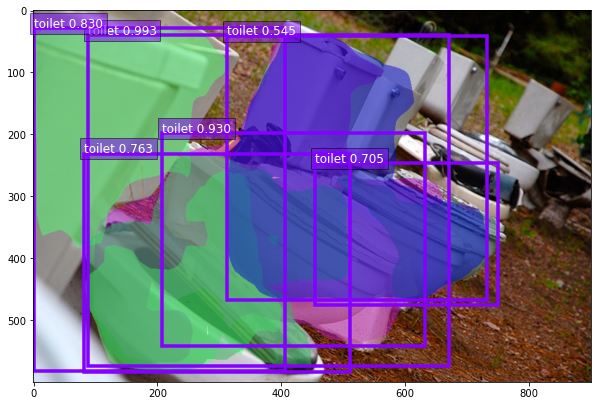

100%|██████████| 89/89 [00:00<00:00, 648.30KB/s]


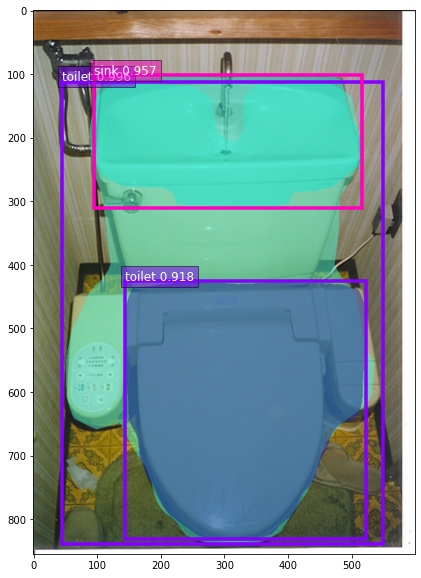

In [4]:
for img in dataset['images'][:10]:
        img_url = img['coco_url']
        im_fname = utils.download(img_url,
                          path=img_url.split('/')[-1])
        x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)
        ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

        # paint segmentation mask on images directly
        width, height = orig_img.shape[1], orig_img.shape[0]
        masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
        orig_img = utils.viz.plot_mask(orig_img, masks)

        # identical to Faster RCNN object detection
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1, 1, 1)
        ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
        plt.show()